# Clean And Analyse Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.


## Step 1: Importing Required Libraries

In [ ]:
print(plt.style.available)

In [48]:
# data manipulation 
import pandas as pd
# numerical operation
import numpy as np
# visualization
import matplotlib.pyplot as plt
# statistical plotseaborn-v0_8-dark-grid
import seaborn as sns

# display plots in notebook
%matplotlib inline

# set the plot style 
sns.set(style="darkgrid")


## Step 2: Loading Data

**Note:**

The dataset utilized for this project was sourced from Kaggle, offering comprehensive insights into social media usage and its impact on emotional well-being. <br>
For reference, the dataset is available at the following link: [Social Media Usage and Emotional Well-Being](https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being/data). <br>
This resource provides valuable data points essential for the analysis and interpretation of user behaviors and emotional trends across various platforms.


In [49]:
df = pd.read_csv('train.csv')
print('Data has been successfully loaded ;)')

Data has been successfully loaded ;)


## step 3: Initial Exploration

In [50]:
df.sample(10)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
937,937,33,Female,Instagram,170.0,7.0,95.0,30.0,38.0,Happiness
952,952,24,Female,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
403,404,28,Female,Instagram,200.0,8.0,110.0,40.0,45.0,Anxiety
572,573,21,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral
912,912,26,Non-binary,Facebook,95.0,3.0,30.0,14.0,18.0,Sadness
614,615,28,Male,Twitter,100.0,6.0,50.0,30.0,29.0,Anger
916,916,21,Non-binary,Facebook,40.0,1.0,10.0,4.0,12.0,Neutral
841,841,31,Male,LinkedIn,45.0,1.0,9.0,4.0,10.0,Sadness
941,941,31,Male,LinkedIn,45.0,1.0,9.0,4.0,10.0,Sadness
514,515,28,Male,Twitter,100.0,6.0,50.0,30.0,29.0,Anger


In [51]:
df.shape

(1001, 10)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [53]:
df.dtypes

User_ID                        object
Age                            object
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

## step 4: Cleaning Data

In [54]:
df['Age'].unique()
df['Gender'].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32', nan],
      dtype=object)

In [55]:
age = df['Age']
gender = df['Gender']

df_ag = pd.DataFrame({'Age': age, 'Gender': gender})
df_ag

,Age,Gender
0,25,Female
1,30,Male
2,22,Non-binary
3,28,Female
4,33,Male
...,...,...
996,33,Non-binary
997,22,Female
998,35,Male
999,28,Non-binary


In [56]:
# df.loc[2, 'Age']
for i in df_ag.index:
    try:
        int(df_ag.loc[i, 'Age'])
    except Exception as e:
        m = df_ag.loc[i, 'Age']
        df_ag.loc[i, 'Age'] = df_ag.loc[i, 'Gender']
        df_ag.loc[i, 'Gender'] = m

df_ag['Age'].unique()
df_ag['Gender'].unique()

array(['Female', 'Male', 'Non-binary',
       ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:'],
      dtype=object)

In [57]:
df['Age'] = df_ag['Age']
df['Gender'] = df_ag['Gender']

In [58]:
df['Age'].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32', nan], dtype=object)

In [59]:
index_value = df.index[df['Gender'] == ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:'].tolist()
index_value

[641]

In [60]:
df.loc[index_value]

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
641,Tabii,NaN,işte mevcut veri kümesini 1000 satıra tamamlı...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.drop(index_value, inplace =True)

In [62]:
df = df.astype({
    'User_ID': np.int64,
    'Age': np.int64,
    'Posts_Per_Day': np.int64,
    'Likes_Received_Per_Day': np.int64,
    'Comments_Received_Per_Day': np.int64,
    'Messages_Sent_Per_Day': np.int64,
})


In [63]:
df.set_index('User_ID')

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
User_ID,,,,,,,,,
1,25,Female,Instagram,120.0,3,45,10,12,Happiness
2,30,Male,Twitter,90.0,5,20,25,30,Anger
3,22,Non-binary,Facebook,60.0,2,15,5,20,Neutral
4,28,Female,Instagram,200.0,8,100,30,50,Anxiety
5,33,Male,LinkedIn,45.0,1,5,2,10,Boredom
...,...,...,...,...,...,...,...,...,...
996,33,Non-binary,Twitter,85.0,4,35,18,18,Boredom
997,22,Female,Facebook,70.0,1,14,6,10,Neutral
998,35,Male,Whatsapp,110.0,3,50,25,25,Happiness


In [64]:
df.duplicated().unique()
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [65]:
df.rename(columns={'Daily_Usage_Time (minutes)':'Daily_Usage_Time(minutes)'}, inplace=True)

## Step 5: Summarizing Data

In [66]:
df['Daily_Usage_Time(hours)'] = df['Daily_Usage_Time(minutes)']/60

In [67]:
df.describe()

,User_ID,Age,Daily_Usage_Time(minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Daily_Usage_Time(hours)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,27.510000,95.950000,3.321000,39.898000,15.611000,22.560000,1.599167
std,288.819436,3.930057,38.850442,1.914582,26.393867,8.819493,8.516274,0.647507
min,1.000000,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000,0.666667
25%,250.750000,24.000000,65.000000,2.000000,20.000000,8.000000,17.750000,1.083333
50%,500.500000,27.500000,85.000000,3.000000,33.000000,14.000000,22.000000,1.416667
75%,750.250000,30.250000,120.000000,4.000000,55.000000,22.000000,28.000000,2.000000
max,1000.000000,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000,3.333333


In [68]:
df.sort_values(by='Daily_Usage_Time(minutes)', axis=0, ascending=False, inplace=True, ignore_index=True)
df

,User_ID,Age,Gender,Platform,Daily_Usage_Time(minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Daily_Usage_Time(hours)
0,4,28,Female,Instagram,200.0,8,100,30,50,Anxiety,3.333333
1,404,28,Female,Instagram,200.0,8,110,40,45,Anxiety,3.333333
2,104,28,Female,Instagram,200.0,8,110,40,45,Anxiety,3.333333
3,504,28,Female,Instagram,200.0,8,110,40,45,Anxiety,3.333333
4,204,28,Female,Instagram,200.0,8,110,40,45,Anxiety,3.333333
...,...,...,...,...,...,...,...,...,...,...,...
995,16,21,Non-binary,Facebook,40.0,1,5,2,10,Neutral,0.666667
996,116,21,Non-binary,Facebook,40.0,1,10,4,12,Neutral,0.666667
997,216,21,Non-binary,Facebook,40.0,1,10,4,12,Neutral,0.666667
998,516,21,Non-binary,Facebook,40.0,1,10,4,12,Neutral,0.666667


## Step 6: Visualize and Analyze the data

In [69]:
df.Platform.unique()

array(['Instagram', 'Snapchat', 'Facebook', 'Whatsapp', 'Telegram',
       'Twitter', 'LinkedIn'], dtype=object)

In [70]:
df.groupby('Platform')['User_ID'].count()

Platform
Facebook     190
Instagram    250
LinkedIn     120
Snapchat      80
Telegram      80
Twitter      200
Whatsapp      80
Name: User_ID, dtype: int64

In [71]:
df_twtr = df[df['Platform'] == 'Twitter']
df_twtr

,User_ID,Age,Gender,Platform,Daily_Usage_Time(minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Daily_Usage_Time(hours)
301,22,24,Female,Twitter,105.0,4,28,14,20,Anger,1.750000
302,722,24,Female,Twitter,105.0,4,35,20,23,Anger,1.750000
303,522,24,Female,Twitter,105.0,4,35,20,23,Anger,1.750000
306,122,24,Female,Twitter,105.0,4,35,20,23,Anger,1.750000
321,622,24,Female,Twitter,105.0,4,35,20,23,Anger,1.750000
...,...,...,...,...,...,...,...,...,...,...,...
733,333,23,Non-binary,Twitter,70.0,3,30,14,18,Neutral,1.166667
734,972,35,Male,Twitter,70.0,1,13,8,10,Boredom,1.166667
735,984,22,Male,Twitter,70.0,1,22,7,22,Neutral,1.166667
737,25,22,Female,Twitter,70.0,3,20,12,15,Sadness,1.166667


In [72]:
df_twtr.groupby('Gender')['User_ID'].count()

Gender
Female         70
Male          110
Non-binary     20
Name: User_ID, dtype: int64

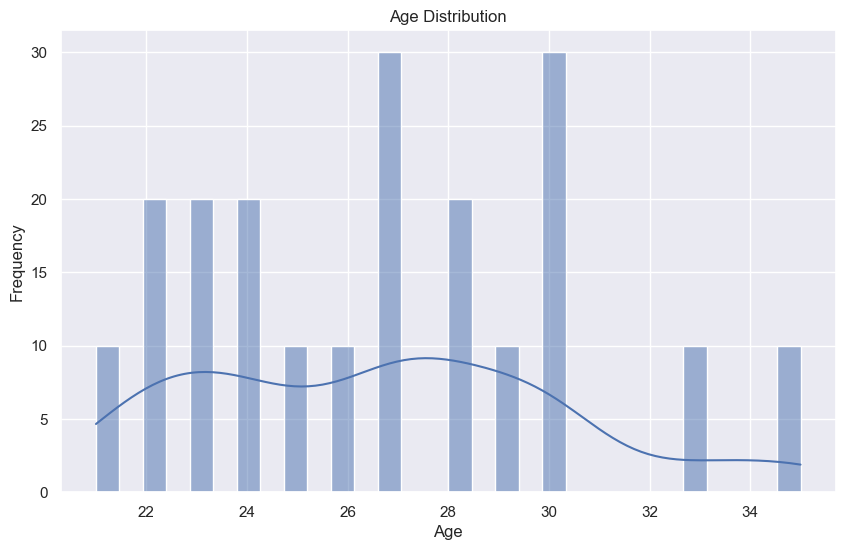

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df_twtr['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

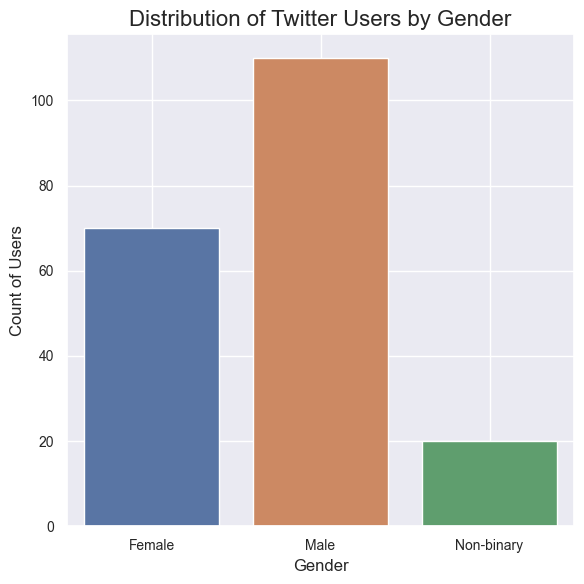

In [74]:
plt.figure(figsize=(6, 6))
sns.countplot(df_twtr, x='Gender', hue='Gender')
plt.title('Distribution of Twitter Users by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(True)
plt.show()

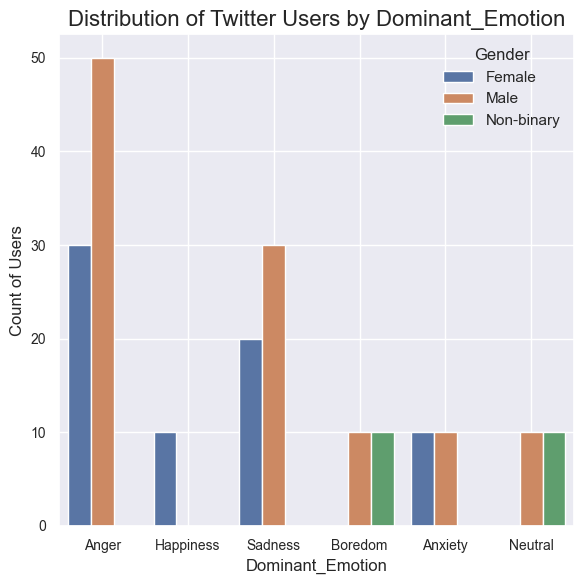

In [75]:
plt.figure(figsize=(6, 6))
sns.countplot(df_twtr, x='Dominant_Emotion', hue='Gender')
plt.title('Distribution of Twitter Users by Dominant_Emotion', fontsize=16)
plt.xlabel('Dominant_Emotion', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(True)
plt.show()

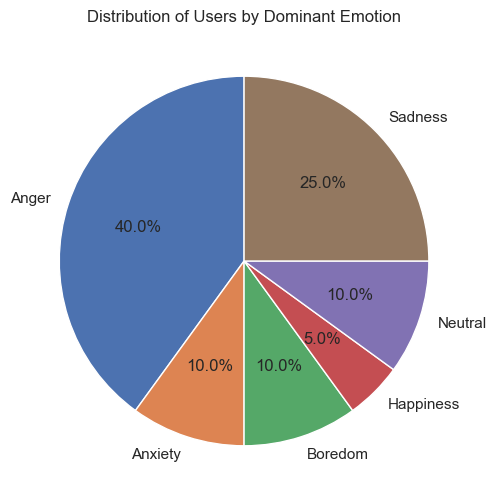

In [76]:
# Grouping by Dominant_Emotion and counting the number of users in each category
emotion_counts = df_twtr.groupby('Dominant_Emotion')['User_ID'].count()
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Users by Dominant Emotion')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15392\1320837866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_twtr, x='Dominant_Emotion', y='Age', palette='Set1')


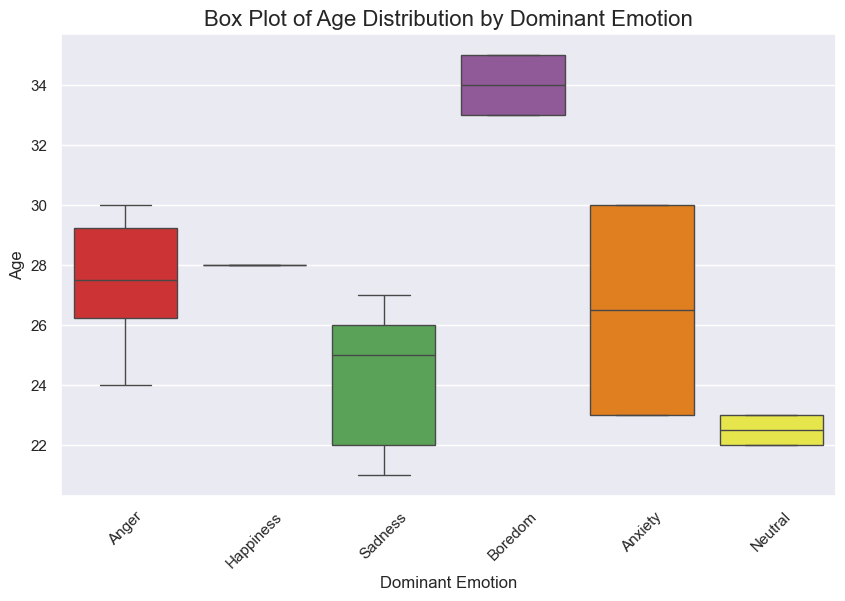

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_twtr, x='Dominant_Emotion', y='Age', palette='Set1')
plt.title('Box Plot of Age Distribution by Dominant Emotion', fontsize=16)
plt.xlabel('Dominant Emotion', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.show()

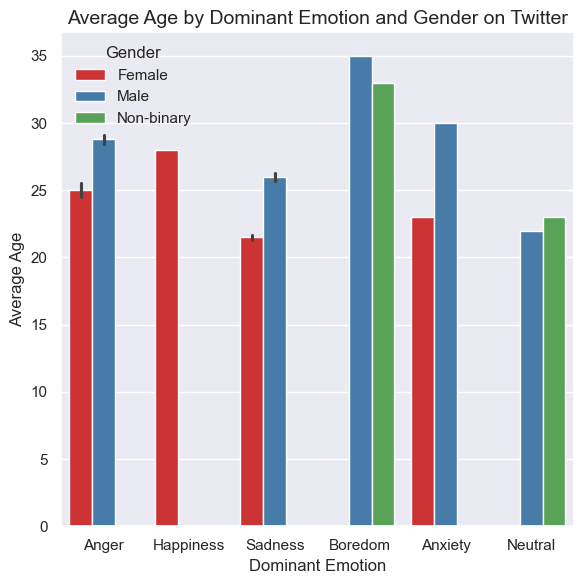

In [77]:
plt.figure(figsize=(6, 6))
sns.barplot(df_twtr, x='Dominant_Emotion', y='Age', hue='Gender', palette='Set1')
plt.title('Average Age by Dominant Emotion and Gender on Twitter', fontsize=14)
plt.xlabel('Dominant Emotion', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.tight_layout()
plt.show()

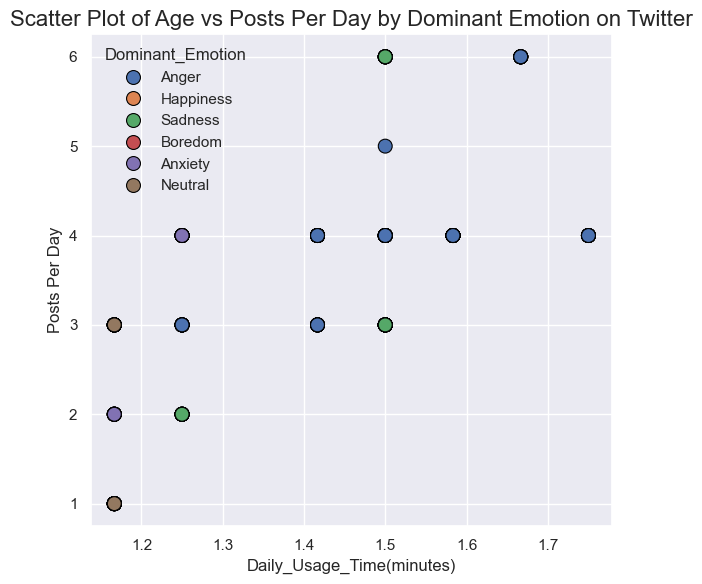

In [82]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_twtr, x='Daily_Usage_Time(hours)', y='Posts_Per_Day', hue='Dominant_Emotion', s=100, edgecolor='black')
plt.title('Scatter Plot of Age vs Posts Per Day by Dominant Emotion on Twitter', fontsize=16)
plt.xlabel('Daily_Usage_Time(minutes)', fontsize=12)
plt.ylabel('Posts Per Day', fontsize=12)
plt.tight_layout()
plt.show()

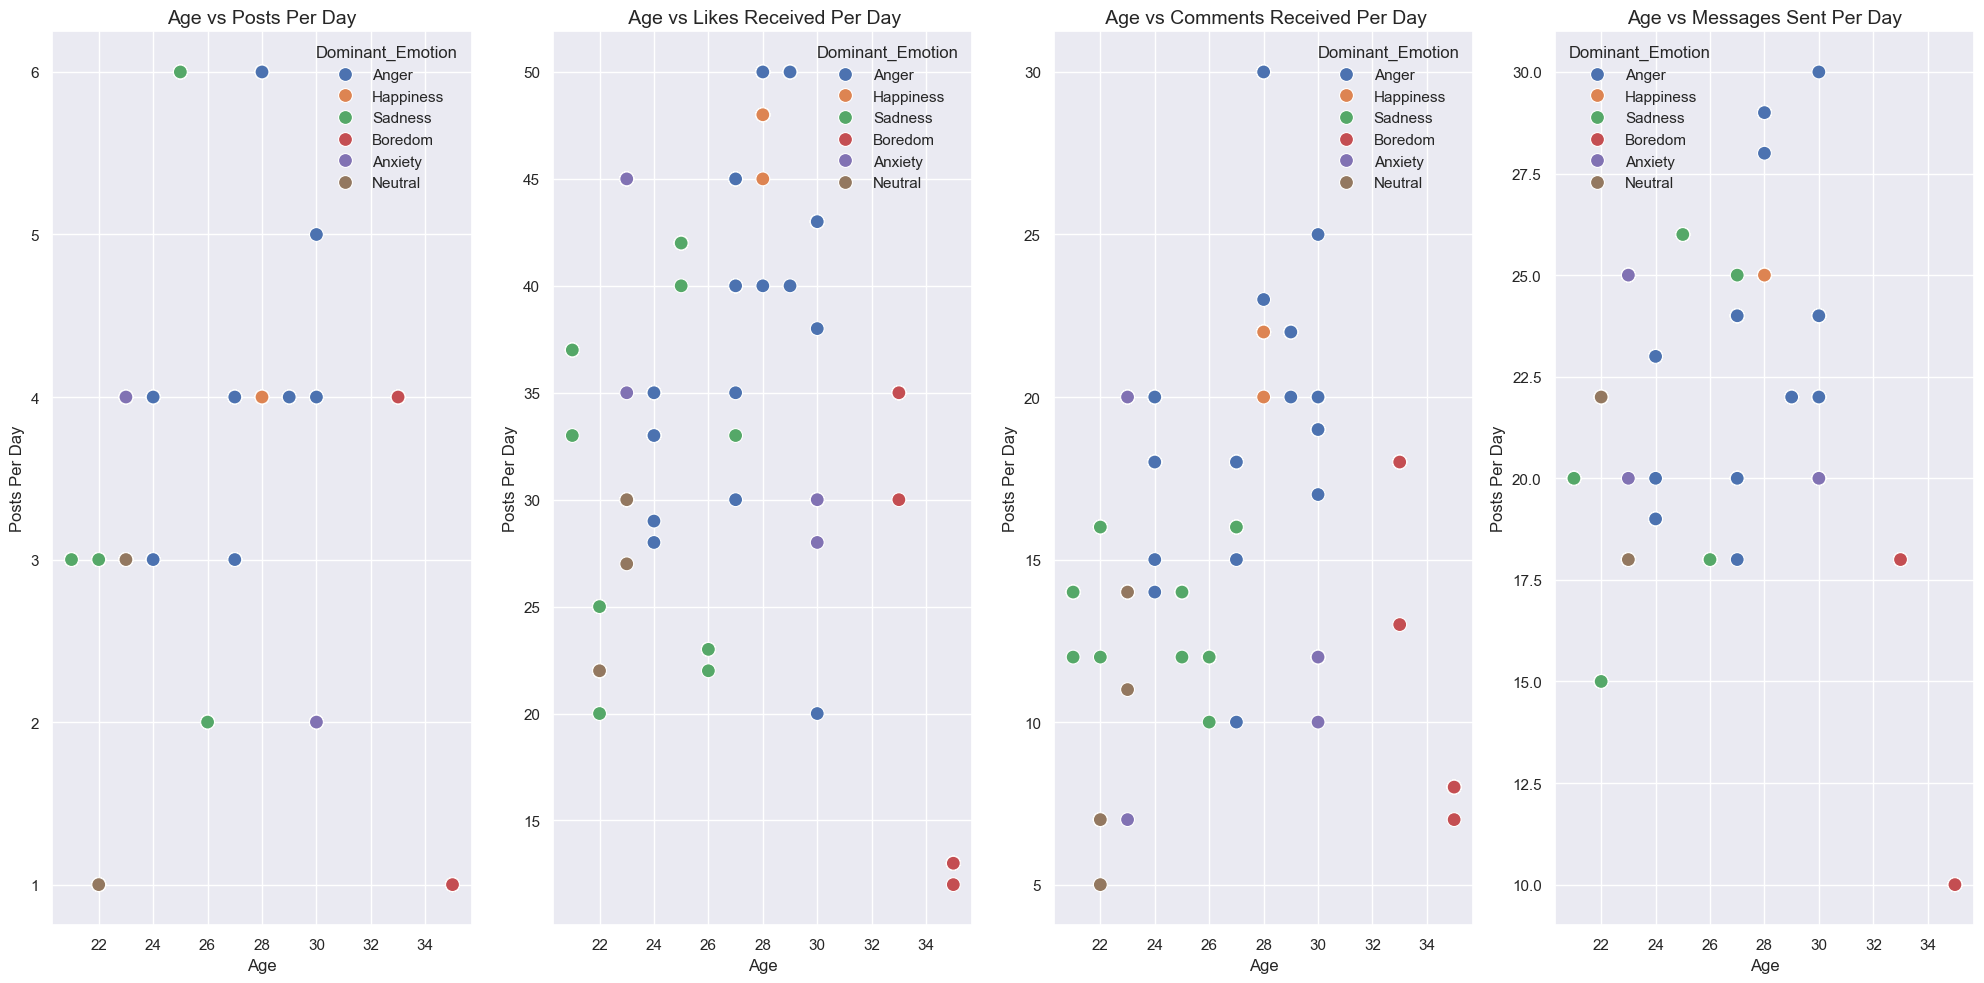

In [84]:
plt.figure(figsize=(20, 10))

# Plot 1: Age vs Posts Per Day
plt.subplot(1, 4, 1)
sns.scatterplot(data=df_twtr, x='Age', y='Posts_Per_Day', hue='Dominant_Emotion', s=100 )
plt.title('Age vs Posts Per Day', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Posts Per Day', fontsize=12)

# Plot 2: Age vs Likes Received Per Day
plt.subplot(1, 4, 2)
sns.scatterplot(data=df_twtr, x='Age', y='Likes_Received_Per_Day', hue='Dominant_Emotion', s=100)
plt.title(' Age vs Likes Received Per Day', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Posts Per Day', fontsize=12)


# Plot 3: Age vs Comments Received Per Day
plt.subplot(1, 4, 3)
sns.scatterplot(data=df_twtr, x='Age', y='Comments_Received_Per_Day', hue='Dominant_Emotion', s=100)
plt.title(' Age vs Comments Received Per Day', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Posts Per Day', fontsize=12)


# Plot 4: Age vs Messages Sent Per Day
plt.subplot(1, 4, 4)
sns.scatterplot(data=df_twtr, x='Age', y='Messages_Sent_Per_Day', hue='Dominant_Emotion',  s=100)
plt.title('Age vs Messages Sent Per Day', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Posts Per Day', fontsize=12)

plt.tight_layout()
plt.show()

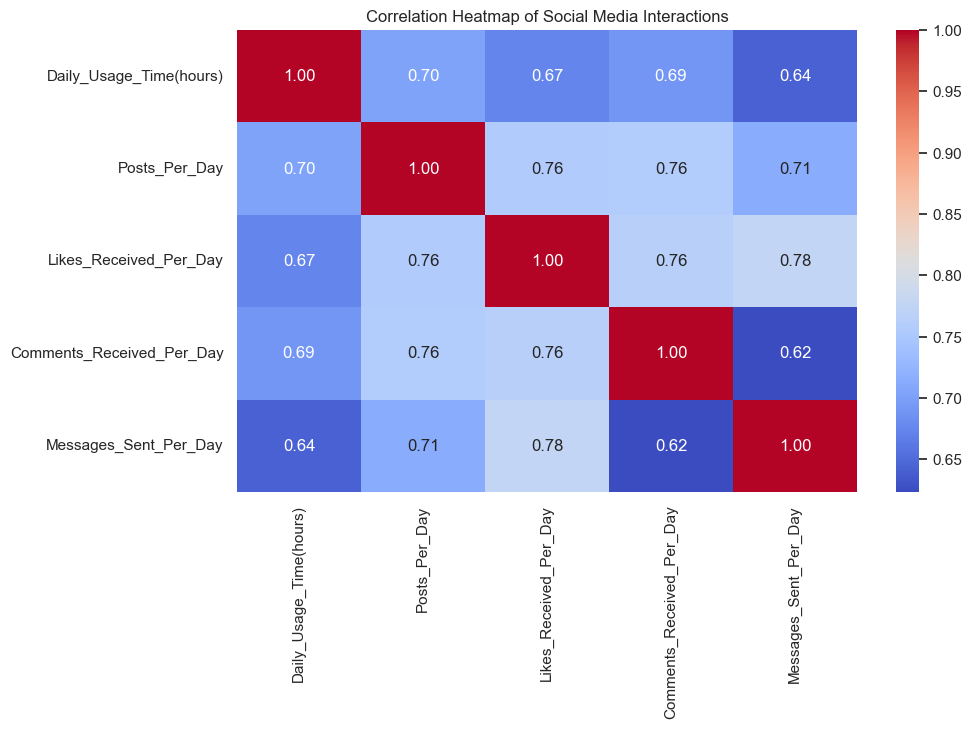

In [80]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_twtr[['Daily_Usage_Time(hours)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Social Media Interactions')
plt.show()


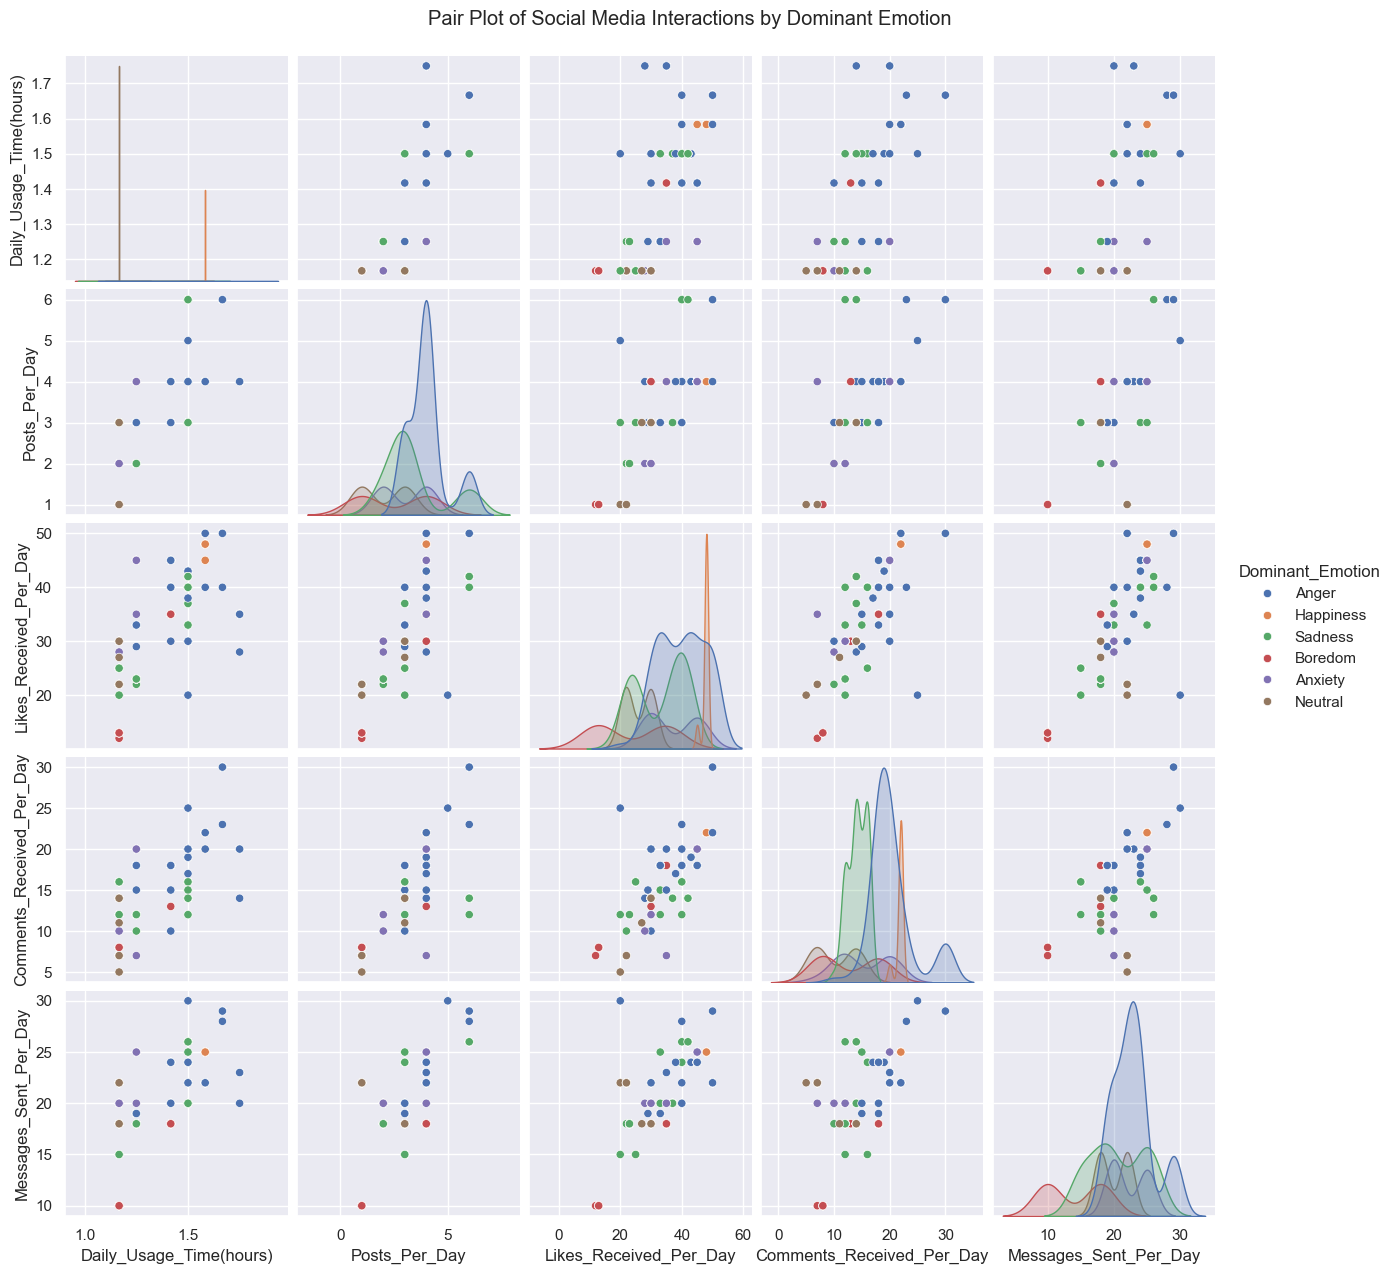

In [85]:
pairplot_data = df_twtr[['Daily_Usage_Time(hours)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']]
sns.pairplot(pairplot_data, hue='Dominant_Emotion', diag_kind='kde')
plt.suptitle('Pair Plot of Social Media Interactions by Dominant Emotion', y=1.02)  # Adjust title position
plt.show()